In [45]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from IPython.display import clear_output

import time
import xlrd
from PIL import Image

import itertools
import shutil


In [2]:
result = pandas.read_csv('./data/train.csv')
print(result[:10])

   image_id  category
0         0        77
1         1        81
2         2        52
3         3        72
4         4        58
5         5         2
6         6        75
7         7        67
8         8        51
9         9        15


In [3]:
total_train_images = 18540
total_categories = 102

In [4]:
images_per_category = [0 for i in range(total_categories+1)]

for image_id in range(total_train_images):
    category = result.iloc[image_id][1] 
    
    images_per_category[category]+=1


print(images_per_category)

#there is no category 0
#to keep the things simple : images_per_category[category] = number of images in category

[0, 90, 135, 90, 126, 147, 102, 90, 192, 105, 102, 198, 198, 111, 108, 111, 93, 192, 186, 111, 126, 90, 135, 207, 96, 93, 93, 90, 150, 177, 192, 117, 102, 105, 90, 99, 171, 243, 126, 93, 153, 288, 135, 294, 210, 90, 441, 153, 162, 111, 207, 582, 192, 210, 138, 162, 246, 153, 258, 153, 246, 114, 126, 123, 117, 231, 138, 96, 123, 123, 141, 177, 216, 438, 387, 270, 243, 567, 309, 93, 237, 375, 252, 297, 195, 144, 132, 144, 348, 414, 186, 171, 150, 105, 366, 288, 207, 150, 186, 144, 111, 132, 108]


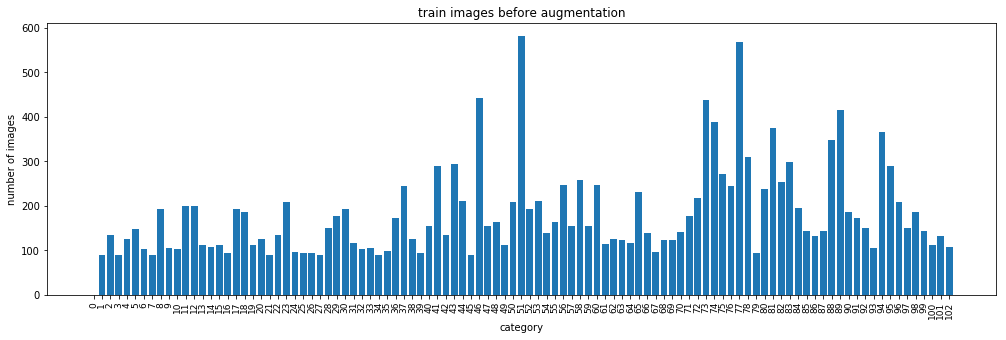

In [78]:
plt.figure(figsize=(17,5))

category_labels = [i for i in range(103)]

plt.bar(category_labels , images_per_category)
plt.xticks(category_labels , fontsize=9, rotation=90)
plt.title('train images before augmentation')
plt.xlabel('category')
plt.ylabel('number of images')

plt.show()


In [69]:
'''
# Create a new directory
base_dir = './datatree'
os.mkdir(base_dir)

#create folders inside train and validation directories

# train_dir
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)

# test_dir
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# create new folders inside train_dir
for category in range(1,total_categories+1):
    nv = os.path.join(train_dir, str(category))
    os.mkdir(nv)
    
# create new folders inside val_dir
for category in range(1,total_categories+1):
    nv = os.path.join(val_dir, str(category))
    os.mkdir(nv)
    
# create new folders inside test_dir
for category in range(1,total_categories+1):
    nv = os.path.join(test_dir, str(category))
    os.mkdir(nv)
'''

In [79]:
#creating train tree
'''
from PIL import Image
path='./datatree/train'
imgpath='./data/train'
for image_id in range(total_train_images):
    category=str(result.iloc[image_id][1])
    image_id=str(image_id)
    
    img=Image.open(imgpath+'/'+image_id+'.jpg')
    img.save(path+'/'+category+'/'+image_id+'.jpg')
'''

In [46]:
#image augmentaion
# Copy the train images into aug_dir
category_labels = [i for i in range(1,103)]

for category in category_labels:
    category=str(category)
    #creating a temporary directories here because we delete these directories later
    #create a base dir
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    

    # list all images in that directory
    img_list = os.listdir('./datatree/train/' + category)

    # Copy images from the class train dir to the img_dir 
    for fname in img_list:
            # source path to image
            src = os.path.join('./datatree/train/' + category, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = './datatree/train/' + category

    # Create a data generator
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                                    target_size=(224,224),
                                                    batch_size=batch_size)



    
    
    num_aug_images_wanted = 500 # total number of images we want to have in each class
    
   
    
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create about 500 augmented images
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)
        
    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')


Found 90 images belonging to 1 classes.
Found 135 images belonging to 1 classes.
Found 90 images belonging to 1 classes.
Found 126 images belonging to 1 classes.
Found 147 images belonging to 1 classes.
Found 102 images belonging to 1 classes.
Found 90 images belonging to 1 classes.
Found 192 images belonging to 1 classes.
Found 105 images belonging to 1 classes.
Found 102 images belonging to 1 classes.
Found 198 images belonging to 1 classes.
Found 198 images belonging to 1 classes.
Found 111 images belonging to 1 classes.
Found 108 images belonging to 1 classes.
Found 111 images belonging to 1 classes.
Found 93 images belonging to 1 classes.
Found 192 images belonging to 1 classes.
Found 186 images belonging to 1 classes.
Found 111 images belonging to 1 classes.
Found 126 images belonging to 1 classes.
Found 90 images belonging to 1 classes.
Found 135 images belonging to 1 classes.
Found 207 images belonging to 1 classes.
Found 96 images belonging to 1 classes.
Found 93 images belong

In [57]:
#file names in each category
path = './datatree/train'
category_file_names= {}

for category in category_labels:
    category_file_names[category] = os.listdir(path+'/'+str(category))

500

In [58]:
#creating validation tree
#by copyting 20% of images from train tree
'''
import os

source='./datatree/train'
dest='./datatree/validation'

for category in category_labels:
    for file , count in zip(category_file_names[category] , range(int(0.2 * len(category_file_names[category])))):
        shutil.move(source + '/' + str(category) + '/' + file , dest + '/' + str(category) )
'''


In [68]:
train_path='./datatree/train'
validation_path='./datatree/validation'

train_images_afteraug=[]
validation_images_afteraug=[]

for category in category_labels:
    train_images_afteraug.append(len(os.listdir(train_path+'/'+str(category))))
    validation_images_afteraug.append(len(os.listdir(validation_path+'/'+str(category))))

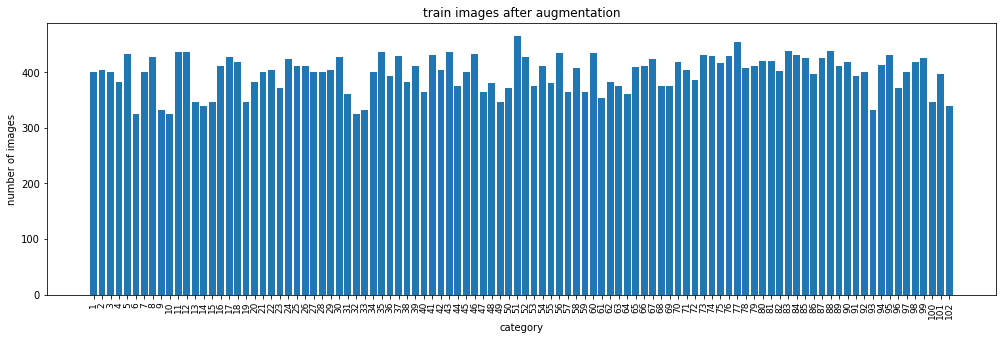

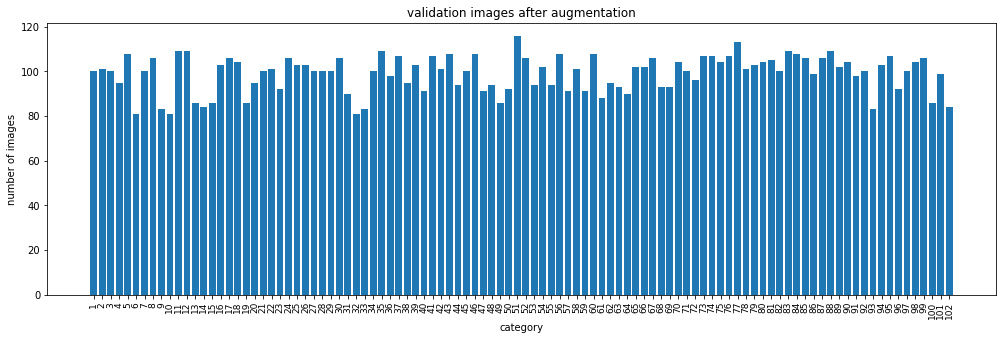

In [81]:
category_labels = [i for i in range(1,103)]

plt.figure(figsize=(17,5))
plt.bar(category_labels , train_images_afteraug)
plt.xticks(category_labels , fontsize=9, rotation=90)
plt.title('train images after augmentation')
plt.xlabel('category')
plt.ylabel('number of images')
plt.show()

plt.figure(figsize=(17,5))
plt.bar(category_labels , validation_images_afteraug)
plt.xticks(category_labels , fontsize=9, rotation=90)
plt.title('validation images after augmentation')
plt.xlabel('category')
plt.ylabel('number of images')
plt.show()

In [85]:
print('total training images:' , sum(train_images_afteraug))
print('total validation images:' , sum(validation_images_afteraug))

total training images: 40591
total validation images: 10101
